In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sbn

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 20)

# Machine Learning (ML)

#### ¿Qué es?

El ML (es español Aprendizaje Automático) es una disciplina del campo de la Inteligencia Artificial que utiliza algorítmos para aprender a reconocer patrones en conjuntos de datos y luego utilizar estos patrones para realizar predicciones. El mundo del ML se basa en la estadística, ser capaz de utilizar los datos para aprender de estos cuál sería el resultado más óptimo ante un problema.  

El principal objetivo de un algorítmo de clasificación de ML es el de aprender a reconocer fronteras. Un algorítmo de ML aprende a distinguir la frontera que servirá para clasificar entre diversas clases, esta frontera se suele conocer como *frontera de clasificación o bayesiana*.

Para el calculo de la frontera se deben realizar algunas suposiciones sobre la naturaleza de los datos como:
- Siguen distribuciones gausianas.
- Las features son independientes.


El objetivo del algorítmo de ML es encontrar la mejor frontera de clasificación, que inicialmente es desconocida. Para esto se debe tener presente que cada algoritmo de ML tiene particularidades para determinar uno u otro tipo de frontera, un clasificador lineal no puede encontrar una frontera cuadrática.


In [2]:
a_h = stats.norm(loc=171.9, scale=10)
a_m = stats.norm(loc=158.0, scale=8)

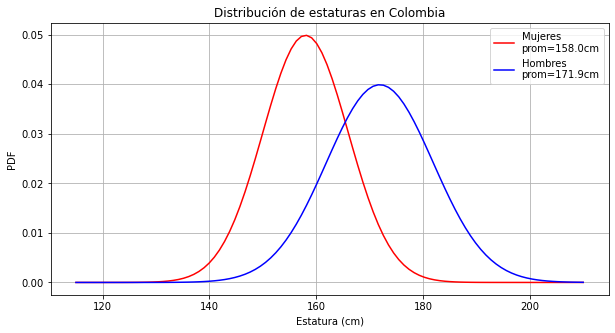

In [3]:
fig, ax = plt.subplots(figsize=(10,5))

x = np.linspace(115,210,100)
ax.plot(x, a_m.pdf(x), color="red",  label=f"Mujeres\nprom={a_m.mean()}cm")
ax.plot(x, a_h.pdf(x), color="blue", label=f"Hombres\nprom={a_h.mean()}cm")
ax.set_xlabel('Estatura (cm)')
ax.set_ylabel('PDF')
ax.set_title("Distribución de estaturas en Colombia")

plt.grid()
plt.legend()
plt.show()

Para este ejemplo, la frontera de clasificación será el punto donde se cruzan ambas distribuciones.

In [4]:
x = np.linspace(140,180, 10000)
frontera = x[np.argmin(np.abs(a_h.pdf(x) - a_m.pdf(x)))]
print(f"La frontera óptima está en los {frontera:.2f}cm")

La frontera óptima está en los 165.43cm


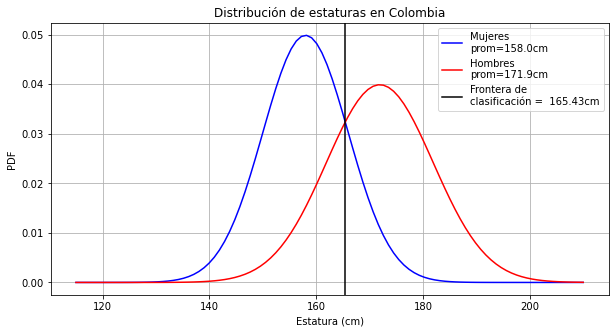

In [5]:
fig, ax = plt.subplots(figsize=(10,5))

x = np.linspace(115,210,100)
ax.plot(x, a_m.pdf(x), color="blue",  label=f"Mujeres\nprom={a_m.mean()}cm")
ax.plot(x, a_h.pdf(x), color="red", label=f"Hombres\nprom={a_h.mean()}cm")
ax.axvline(frontera, color="black", label=f"Frontera de\nclasificación = {frontera: .2f}cm")
ax.set_xlabel('Estatura (cm)')
ax.set_ylabel('PDF')
ax.set_title("Distribución de estaturas en Colombia")

plt.grid()
plt.legend()
plt.show()

Debido a la existencia de esta frontera pueden darse errores de clasificación

In [6]:
print (f"p(H|M) ={1 - a_m.cdf(frontera): .2f}")
print (f"p(M|H) ={a_h.cdf(frontera): .2f}")

p(H|M) = 0.18
p(M|H) = 0.26


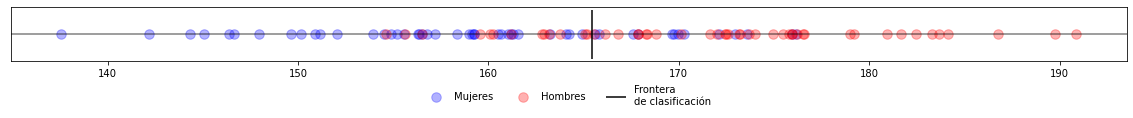

In [7]:
fig, ax = plt.subplots(figsize=(20, 1))

N = 50
np.random.seed(0)
a_md = np.random.normal(loc=a_m.mean(), scale=a_m.std(), size=N)
a_hd = np.random.normal(loc=a_h.mean(), scale=a_h.std(), size=N)

ax.scatter(x=a_md, y=np.zeros_like(a_md), color="blue", alpha=0.3, s=90, label="Mujeres")
ax.scatter(x=a_hd, y=np.zeros_like(a_hd), color= "red", alpha=0.3, s=90, label="Hombres")

ax.vlines(frontera, ymin=-0.5, ymax=0.5, color="black", label="Frontera\nde clasificación", alpha=1)
ax.axhline(color="black", alpha=0.5)

ax.set_yticks([])
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -1), ncol=3, frameon=False)
plt.show()

#### Caso 2D
A continuación se genera un conjunto de datos aleatorios mediante *mlutils* y se trata de realizar varios tipos de clasificaciones.

In [8]:
# copiando el archivo mlutils.py en la carpeta local
#!wget "https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s06/mlutils.py"
import mlutils

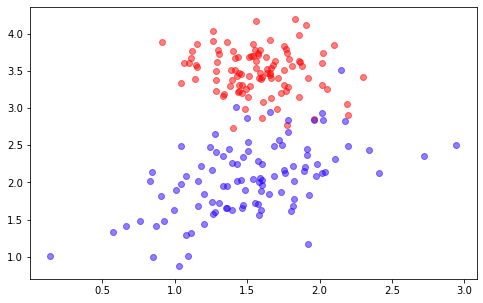

In [9]:
# Generar los datos
mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 3.5], cov0=[[0.1, 0.0], [0.0, 0.1]],
                                       mean1=[1.5, 2],   cov1=[[0.2, 0.1], [0.1, 0.2]])

np.random.seed(1)
X, y = mc.sample(200)

# Gráfica
fig = plt.figure(figsize=(8,5))
mlutils.plot_2Ddata(X, y)

Clasificación lineal

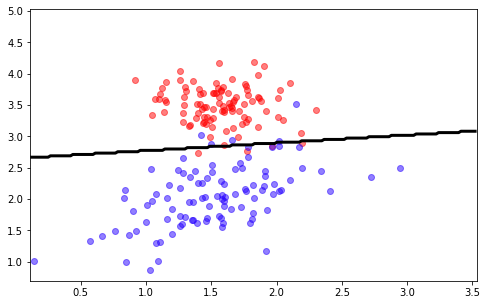

In [10]:
# Estimador
e = LogisticRegression()

# Entrenamiento del estimador
e.fit(X,y)

# Gráfica de la clasificación
fig = plt.figure(figsize=(8,5))
mlutils.plot_2Ddata_with_boundary(e.predict, X, y)
plt.show()

Con una máquina de soporte vectorial

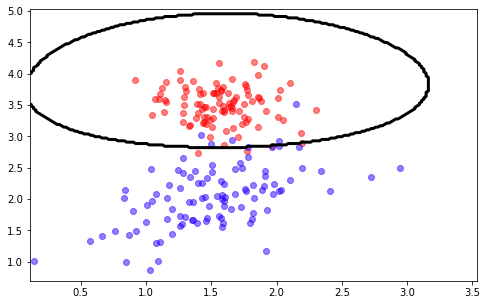

In [11]:
# Estimador
e_svc = SVC()

# Entrenamiento del estimador
e_svc.fit(X,y)

# Gráfica de la clasificación
fig = plt.figure(figsize=(8,5))
mlutils.plot_2Ddata_with_boundary(e_svc.predict, X, y)
plt.show()

Usando Random Forest

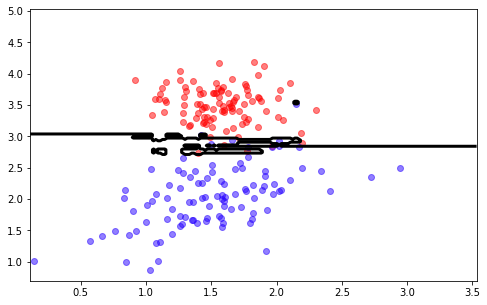

In [12]:
# Estimador
e_rf = RandomForestClassifier()

# Entrenamiento del estimador
e_rf.fit(X,y)

# Gráfica de la clasificación
fig = plt.figure(figsize=(8,5))
mlutils.plot_2Ddata_with_boundary(e_rf.predict, X, y)
plt.show()

# Terminología

Existen conceptos clave que sientan las bases para una mejor comprensión del ML. A continuación la nomenclatura (términos estándar) que se utilizan para describir los datos, así como los términos utilizados para describir el aprendizaje y el modelado. Un conjunto de datos suele tener la estructura:

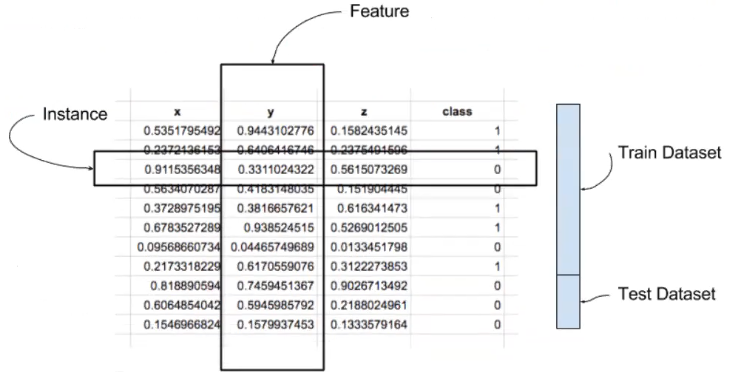

* **Instancia**: A una sola fila de datos se le llama instancia. También se le conoce como una observación del dominio.
* **Característica** (Feature): A una sola columna de datos se le llama característica. Es un componente de una observación y también se denomina atributo de una instancia de datos (La característica se suele asociar con el atributo y su valor, aunque la mayoría de las veces se usan los conceptos atributo y característica indistintamente). Algunas features pueden ser entradas a un modelo (predictores) y otras pueden ser salidas o las características a predecir (también llamadas *labels*).
* **Datos de entrenamiento**: Conjunto de datos que introducimos a nuestro algoritmo para entrenar nuestro modelo.
* **Datos de prueba**: Conjunto de datos que utilizamos para validar la precisión de nuestro modelo pero que no se utiliza para entrenarlo. Puede llamarse conjunto de datos de validación.

Otros términos que usualmente se encuentran en el mundo del ML son:

* **Parámetros del modelo**: Son aquellos que pertenecen al modelo utilizado para realizar el procedimiento de ajuste. Por ejemplo, si se trata de ajustar un conjunto de datos a una recta cuya ecuación está dada por la expresión *y = mx + b* entonces los parámetros de este modelo serán *m* y *b*. 

* **Hiperparámetros**: Es un parámetro de un algoritmo de aprendizaje (no del modelo). Como tal, no se ve afectado por el algoritmo de aprendizaje en sí; debe establecerse antes al entrenamiento y permanece constante durante el entrenamiento.

* **Métrica**: Medida cuantitativa usada para evaluar el rendimiento del algoritmo.

## Características fundamentales sobre los datos
### <center> ¡Los datos son más importantes que los algoritmos! </center>
* **Cantidad insuficiente de datos de entrenamiento**: Se necesitan muchos datos para que la mayoría de los algoritmos de ML funcionen correctamente. Incluso para problemas muy simples, generalmente se necesitan miles de ejemplos, y para problemas complejos, como el reconocimiento de imágenes, o de voz, puede necesitarse millones de ejemplos. 

* **Datos de entrenamiento no representativos**: Para generalizar bien, es crucial que los datos de entrenamiento sean representativos de los nuevos casos que se desean generalizar. Al usar un conjunto de entrenamiento no representativo, entrenamos un modelo con el cual es poco probable obtener predicciones precisas. Incluso muestras muy grandes pueden no ser representativas si el método de muestreo es defectuoso (sesgo en el muestreo).

* **Datos de baja calidad**: Obviamente, si los datos de entrenamiento están llenos de errores, valores atípicos y ruido (por ejemplo, debido a mediciones de baja calidad), será más difícil para el algoritmo detectar los patrones subyacentes, por lo que es menos probable que funcione bien. ¡Siempre vale la pena dedicar tiempo a limpiar los datos!

* **Características irrelevantes**: El sistema solo será capaz de aprender si los datos de entrenamiento contienen suficientes características relevantes. Una parte fundamental del éxito de un proyecto de ML es crear un buen conjunto de características parimportantesa el entrenamiento. Este proceso se conoce como ingeniería de características. 



# Tipos de aprendizaje

## Aprendizaje supervisado

El aprendizaje supervisado implica de alguna manera modelar la relación entre las características de los datos y alguna etiqueta asociada a estos; una vez que se determina el modelo, se puede usar para asociar etiquetas a datos nuevos y desconocidos. El aprendizaje supervisado se subdivide en clasificación y regresión: En clasificación se tienen etiquetas discretas, mientras que en la regresión, las etiquetas son cantidades continuas.

### Clasificación: Prediciendo etiquetas discretas.

En clasificación, se tiene un conjunto de **puntos etiquetados** y se desea utilizarlos para clasificar algunos puntos no etiquetados. Considérese la siguiente figura

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-classification-1.png)

En ella se tienen dos características para cada punto representadas por las coordenadas (x, y). Además, hay una etiqueta para cada punto (lo que les da una clase) representada por el color del punto. A partir de estas características y etiquetas, se desea crear un modelo que permita decidir si un nuevo punto debe etiquetarse como "azul" o "rojo". Un posible modelo es asumir que los dos grupos pueden separarse dibujando una línea recta a través del plano entre ellos, de modo que los puntos a cada lado de la línea caen en el mismo grupo.

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-classification-2.png)

Este modelo es una versión cuantitativa del enunciado "una línea recta separa las clases", mientras que los parámetros del modelo son los números que describen la ubicación y orientación de la línea (pendiente e intercepto). Los valores óptimos para estos parámetros se **aprenden** de los datos (este es el "aprendizaje" en ML), que a menudo se denomina *entrenar el modelo*. Ahora que el modelo ha sido entrenado, se puede generalizar a datos nuevos sin etiquetas. Esta etapa generalmente se llama **predicción**.


## Aprendizaje no supervisado

El aprendizaje no supervisado implica modelos que describen datos sin referencia a cualquier etiqueta conocida. Un caso común de aprendizaje no supervisado es el de *agrupamiento* (clustering) en el que los datos se asignan automáticamente a un cierto número de grupos discretos. Por ejemplo, considere el caso descrito por la imagen abajo

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-clustering-1.png)

A simple vista, está claro que cada uno de estos puntos es parte de un grupo distinto. Dada esta entrada, un modelo de agrupamiento utilizará la estructura intrínseca de los datos para determinar qué puntos están relacionados, con un resultado como el siguiente

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-clustering-2.png)

Algunos algoritmos de aprendizaje no supervisado son:

* Agrupamiento
  * Jerárquico
  * Basado en densidad
  * k-means

# **Scikit-Learn**

Hay varias bibliotecas de Python que proporcionan implementaciones sólidas de una variedad de algoritmos de ML. Uno de los más conocidos es [Scikit-Learn](https://scikit-learn.org/stable/), un paquete que proporciona versiones eficientes de una gran cantidad de algoritmos comunes. Scikit-Learn se caracteriza por ser una API limpia, uniforme y optimizada, así como por una documentación en línea muy útil y completa. La API de Scikit-Learn está notablemente bien diseñada. Los principales principios de diseño son:

* **Estimadores**: Cualquier objeto que pueda estimar algunos parámetros basado en un conjunto de datos se llama *estimador*. La estimación en sí misma se realiza mediante el método `fit()`, y solo toma un conjunto de datos como parámetro (o dos para algoritmos de aprendizaje supervisados; el segundo conjunto de datos contiene las etiquetas). Cualquier otro parámetro necesario para guiar el proceso de estimación se considera un hiperparámetro.

* **Transformadores**: Algunos estimadores (como el imputer) también pueden transformar un conjunto de datos; Estos se llaman transformadores. Una vez más, la API es bastante simple: la transformación se realiza mediante el método `transform()` con el conjunto de datos para transformar como parámetro. Los transformadores también tienen un método conveniente llamado `fit_transform()` que es equivalente a llamar a `fit()` y luego aplicar `transform()`.

* **Predictores**: Finalmente, algunos estimadores son capaces de hacer predicciones dado un conjunto de datos, estos se conocen como predictores. Un predictor tiene un método `predict()` que toma un conjunto de datos de nuevas instancias y devuelve un conjunto de datos de predicciones correspondientes. También tiene un método `score()` que mide la calidad de las predicciones dado un conjunto de prueba. (El modelo `LinearRegression` que se verá más adelante es un ejemplo de un predictor).

Algunos ejemplos:

In [13]:
data = pd.DataFrame({"A":[1, 2, 3,      np.nan, 5,  6],
                     "B":[1, 4, np.nan, 16,     25, np.nan]})
data

,A,B
0,1.0,1.0
1,2.0,4.0
2,3.0,NaN
3,NaN,16.0
4,5.0,25.0
5,6.0,NaN


In [14]:
data.A.mean(), data.B.mean()

(3.4, 11.5)

In [15]:
# Estimador
e = SimpleImputer(strategy='mean')

# Estimación
e.fit(X=data)

# Transformador
pd.DataFrame(e.transform(data))

/home/brayan/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/brayan/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


,0,1
0,1.0,1.0
1,2.0,4.0
2,3.0,11.5
3,3.4,16.0
4,5.0,25.0
5,6.0,11.5


# Tratamiento de datos

ML se trata de crear modelos a partir de datos. Por esta razón, se presentan a continuación algunos aspectos necesarios del tratamiento de los datos previos a la aplicación del algoritmo de ML en sklearn.

#### Datos de entrenamiento y de prueba

Se inicia por crear la matrix de características **X** y el vector (serie) de etiquetas **y**. 

Generalmente se elige el 20% de los datos para la prueba y el resto para el entrenamiento. Los datos se deben dividir eligiendo los datos de manera aleatoria. Existen varias maneras de realizar este proceso

   1) Crear una función que seleccione un porcentaje de los datos aleatoriamente (habitualmente el 20% serían datos de prueba).
      
   2) De la librería `sklearn.model_selection` usar las funciones:
      
      * train_test_split
       
      * StratifiedShuffleSplit 
      
La primera función dividirá los datos en los mismos índices (esto es muy útil, por ejemplo, si tenemos un DataFrame separado para las etiquetas). La segunda función hace lo que se conoce como un muestreo estratificado, el cual se usa en el caso de que no haya suficientes datos (de alguna clase) y se quiera evitar introducir sesgos.


In [16]:
N1 = 10
N2 = 100 - N1

np.random.seed(0)
labels = np.concatenate( (np.zeros(N1, dtype=int), np.ones(N2, dtype=int)))
np.random.shuffle(labels)

data = pd.DataFrame({"y": labels,
                     "A": np.random.randint(low=1, high=10, size=N1+N2),
                     "B": np.random.randint(low=1, high=10, size=N1+N2)
                    })

data

,y,A,B
0,1,3,8
1,1,1,4
2,0,4,3
3,1,3,4
4,1,1,8
...,...,...,...
95,1,5,8
96,1,6,5
97,1,4,2
98,1,4,4


Uso de train_test_split

In [17]:
# Features / características
X = data.drop("y", axis=1)

# Labels
y = data["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [18]:
# datos para training
pd.concat((y_train, X_train), axis=1)

,y,A,B
50,1,7,8
2,0,4,3
17,1,2,6
85,1,9,7
5,1,8,8
...,...,...,...
83,1,8,3
67,1,9,9
25,1,1,9
68,1,3,8


In [19]:
# datos para testing
pd.concat((y_test, X_test), axis=1)

,y,A,B
37,1,3,2
26,0,1,9
78,1,4,1
91,1,4,1
49,0,4,7
15,1,4,1
93,1,6,6
71,1,7,9
86,1,5,4
22,0,9,2


StratifiedShuffleSplit

In [20]:
sss = StratifiedShuffleSplit(n_splits=4, test_size=0.2, random_state=10)
sss

StratifiedShuffleSplit(n_splits=4, random_state=10, test_size=0.2,
            train_size=None)

In [21]:
for train_index, test_index in sss.split(X, y):
    #print(test_index, train_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
    print(f"1's = {np.sum(Y_test==1)}\n0's={np.sum(Y_test==0)}\n{pd.concat((Y_test, X_test), axis=1)}\n")

1's = 18
0's=2
    y  A  B
12  1  4  6
18  1  3  6
58  1  4  1
63  1  7  5
47  1  1  7
26  0  1  9
0   1  3  8
81  1  7  7
90  1  3  6
78  1  4  1
15  1  4  1
34  1  9  2
9   1  8  3
82  1  6  5
94  0  4  5
30  1  4  4
38  1  1  5
71  1  7  9
42  1  9  6
60  1  9  1

1's = 18
0's=2
    y  A  B
32  1  9  4
96  1  6  5
0   1  3  8
80  1  4  1
92  1  8  9
21  1  7  2
64  1  6  4
43  1  3  3
77  1  3  8
86  1  5  4
53  1  9  2
99  1  8  4
10  1  3  9
49  0  4  7
7   1  1  2
17  1  2  6
2   0  4  3
1   1  1  4
72  1  2  8
59  1  2  7

1's = 18
0's=2
    y  A  B
80  1  4  1
9   1  8  3
71  1  7  9
43  1  3  3
41  1  4  6
91  1  4  1
39  1  9  3
44  0  9  6
37  1  3  2
16  1  5  3
83  1  8  3
60  1  9  1
99  1  8  4
76  1  4  5
94  0  4  5
66  1  9  9
93  1  6  6
77  1  3  8
88  1  6  8
59  1  2  7

1's = 18
0's=2
    y  A  B
58  1  4  1
80  1  4  1
82  1  6  5
27  1  7  5
16  1  5  3
45  1  5  8
63  1  7  5
4   1  1  8
23  1  3  1
30  1  4  4
36  1  4  3
55  1  1  3
18  1  3  6
56  1  7  1
4